<a href="https://colab.research.google.com/github/DESOLATE17/ML/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа 2**

Обработка пропусков в данных.
Загрузим датасет

In [50]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/car_prices.csv")
data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [38]:
data.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Удалим строки с пустым полем sellingprice

In [53]:
data = data[data['sellingprice'].notna()]

In [54]:
data.fillna(data.median(numeric_only=True), inplace=True)

<ipython-input-54-87ee2c7a7293>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace=True)


In [41]:
data.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65351
vin                 4
state               0
condition           0
odometer            0
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [42]:
total_count = data.shape[0]
total_count


558825

Кодирование категориальных признаков и очистка данных для объектов

In [55]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = lbl_enc.fit_transform(data[col])

In [56]:
data.fillna(data.mode(), inplace=True)

<ipython-input-56-fe7638a949e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mode(), inplace=True)


In [45]:
data.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [57]:
data['transmission'].unique()

array([1, 4, 2, 0, 3])

Масштабирование данных

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import matplotlib.pyplot as plt

In [59]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['sellingprice']])

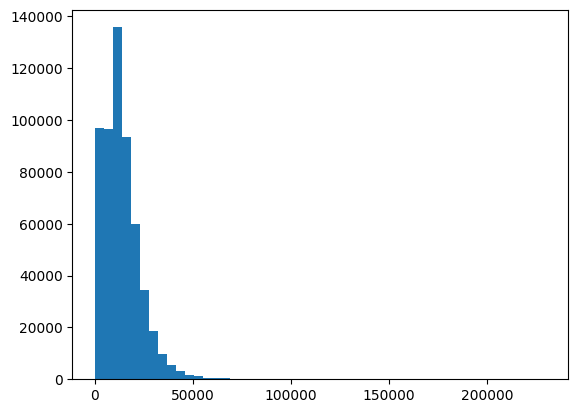

In [61]:
plt.hist(data['sellingprice'], 50)
plt.show()

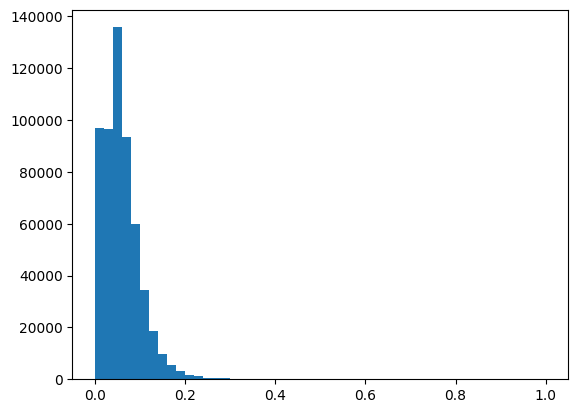

In [62]:
plt.hist(sc1_data, 50)
plt.show()

In [63]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['sellingprice']])

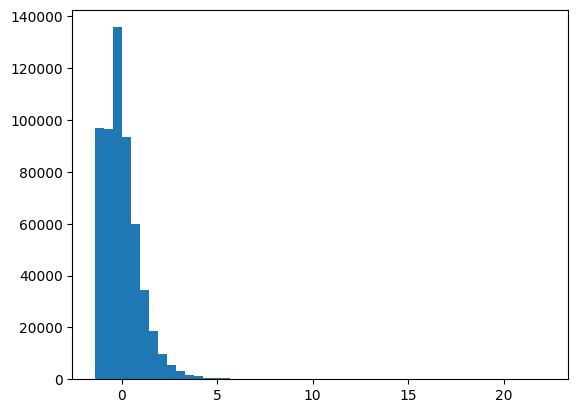

In [64]:
plt.hist(sc2_data, 50)
plt.show()